## Import

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('./datas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./datas\database.sqlite
./datas\iris.csv


In [4]:
!pip install matplotlib seaborn scikit-learn pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/114.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 114.6/114.6 kB 1.7 MB/s eta 0:00:00
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 7.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.1 MB 8.4 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/8.1 MB 9.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 12.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.2/8.1 MB 15.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.3/8.1 MB 18.5 MB/s eta 0:00:01
   ------------------------ --------------- 4.9/8.1 MB 17.4 MB/s eta 0:00:01
   ---------------------------- 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

import warnings
warnings.filterwarnings('ignore')

## Lecture Donnee

In [6]:
df = pd.read_csv('./datas/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Affichage Donnee

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df = df.sample(frac=1)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor


## Preparation Donnee

In [10]:
x = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
113,5.7,2.5,5.0,2.0
57,4.9,2.4,3.3,1.0
67,5.8,2.7,4.1,1.0
148,6.2,3.4,5.4,2.3
129,7.2,3.0,5.8,1.6
145,6.7,3.0,5.2,2.3
103,6.3,2.9,5.6,1.8
87,6.3,2.3,4.4,1.3


In [11]:
y = df[["Species"]]
y.head(10)

,Species
50,Iris-versicolor
51,Iris-versicolor
113,Iris-virginica
57,Iris-versicolor
67,Iris-versicolor
148,Iris-virginica
129,Iris-virginica
145,Iris-virginica
103,Iris-virginica
87,Iris-versicolor


### Entrainement Modele

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaler_X = StandardScaler() # Initialisation d’un standardiseur pour la variable explicative X
#scaler_y = StandardScaler() # Initialisation d’un standardiseur pour la variable cible y

# Apprentissage des paramètres (moyenne, écart-type) sur X_train et transformation des données
#X_train_scaled = scaler_X.fit_transform(X_train)

# Apprentissage des paramètres sur y_train et transformation des données
#y_train_scaled = scaler_y.fit_transform(y_train)

# Transformation de X_test à l’aide des paramètres appris sur X_train (pas de fit ici)
#X_test_scaled = scaler_X.transform(X_test)

# Transformation de y_test à l’aide des paramètres appris sur y_train (pas de fit ici non plus)
#y_test_scaled = scaler_y.transform(y_test)

### Fonction

In [13]:
import joblib

In [14]:
def save_model(model, scal_x, scal_y, filename: str):
    """
    Enregistre le modèle dans un fichier.
    
    Paramètres :
    - model : le modèle à enregistrer
    - filename : nom du fichier dans lequel enregistrer le modèle
    """
    filename = filename.lower()
    
    model_dir = "../models/"
    
    # Créer le répertoire models s'il n'existe pas
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Créer le répertoire du modèle s'il n'existe pas
    model_path = os.path.join(model_dir, filename)
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    # Sauvegarder le modèle et les scalers
    joblib.dump(model, f"{model_path}/{filename}.pkl")
    joblib.dump(scal_x, f"{model_path}/{filename}_scaler_X.pkl")
    joblib.dump(scal_y, f"{model_path}/{filename}_scaler_y.pkl")
    print(f"Modèle enregistré dans {model_path}")

## Use DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict([[6.1,3.0,4.9,1.8]])
print(y_pred)

['Iris-virginica']


[Text(0.4444444444444444, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [43, 39, 38]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.38888888888888884, 0.8333333333333333, 'True  '),
 Text(0.5555555555555556, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.139\nsamples = 40\nvalue = [0, 3, 37]'),
 Text(0.66666666666666

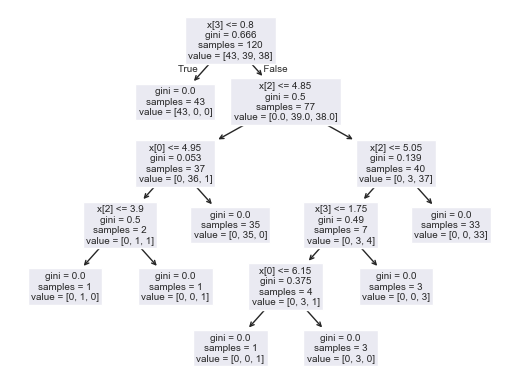

In [16]:
tree.plot_tree(clf)


### DecisionTreeClassifier Test

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,y_pred))

### DecisionTreeClassifier Save

In [ ]:
save_model(clf, X_train, y_train, "decision_tree_classifier")

## Use RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train.values.ravel())

# Prédiction sur un exemple
y_pred_rf = rf_clf.predict([[6.1,3.0,4.9,1.8]])
print(f"Prédiction RandomForest: {y_pred_rf}")

In [ ]:
# Affichage de l'importance des features
importances = rf_clf.feature_importances_
feature_names = X_train.columns

# Visualisation de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Importance des features - RandomForestClassifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Use RandomForestClassifier Test

In [ ]:
# Test du RandomForestClassifier sur les données de test
y_pred_rf_test = rf_clf.predict(X_test)

# Affichage du rapport de classification
print("Rapport de classification - RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf_test))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.title('Matrice de confusion - RandomForestClassifier')
plt.show()

### RandomForestClassifier Save

In [ ]:
# Sauvegarder le modèle RandomForestClassifier
save_model(rf_clf, X_train, y_train, "random_forest_classifier")

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

print("Bibliothèques importées avec succès")

In [ ]:
# Test de la fonction save_model corrigée
def save_model(model, scal_x, scal_y, filename: str):
    """
    Enregistre le modèle dans un fichier.
    
    Paramètres :
    - model : le modèle à enregistrer
    - filename : nom du fichier dans lequel enregistrer le modèle
    """
    filename = filename.lower()
    
    model_dir = "../models/"
    
    # Créer le répertoire models s'il n'existe pas
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Créer le répertoire du modèle s'il n'existe pas
    model_path = os.path.join(model_dir, filename)
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    # Sauvegarder le modèle et les scalers
    joblib.dump(model, f"{model_path}/{filename}.pkl")
    joblib.dump(scal_x, f"{model_path}/{filename}_scaler_X.pkl")
    joblib.dump(scal_y, f"{model_path}/{filename}_scaler_y.pkl")
    print(f"Modèle enregistré dans {model_path}")

# Test de la fonction avec un modèle simple
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('./datas/iris.csv')
x = df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df[["Species"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test de sauvegarde
save_model(clf, X_train, y_train, "test_model")
print("Test de la fonction save_model réussi")

In [21]:
model_dir = "../models/random_forest_classifier"
model_random_forest_classifier = joblib.load(f"{model_dir}/random_forest_classifier.pkl")
model_random_forest_classifier_scalerX = joblib.load(f"{model_dir}/random_forest_classifier_scaler_X.pkl")
model_random_forest_classifier_scalerY = joblib.load(f"{model_dir}/random_forest_classifier_scaler_y.pkl")

# Test de prédiction avec le modèle chargé
input_data = [[6.1,3.0,4.9,1.8]]
#input_data_scaled = model_random_forest_classifier_scalerX.transform(input_data)
y_pred_loaded = model_random_forest_classifier.predict(input_data)
#y_pred = model_random_forest_classifier_scalerY.inverse_transform(y_pred_loaded.reshape(-1, 1))
print(f"Prédiction avec le modèle chargé: {y_pred_loaded}")





Prédiction avec le modèle chargé: ['Iris-virginica']
